In [39]:
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

In [10]:
iris_train = pd.read_csv("./train_iris.csv", index_col = 0)

In [11]:
iris_test = pd.read_csv("./test_iris.csv", index_col = 0)

In [12]:
iris_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


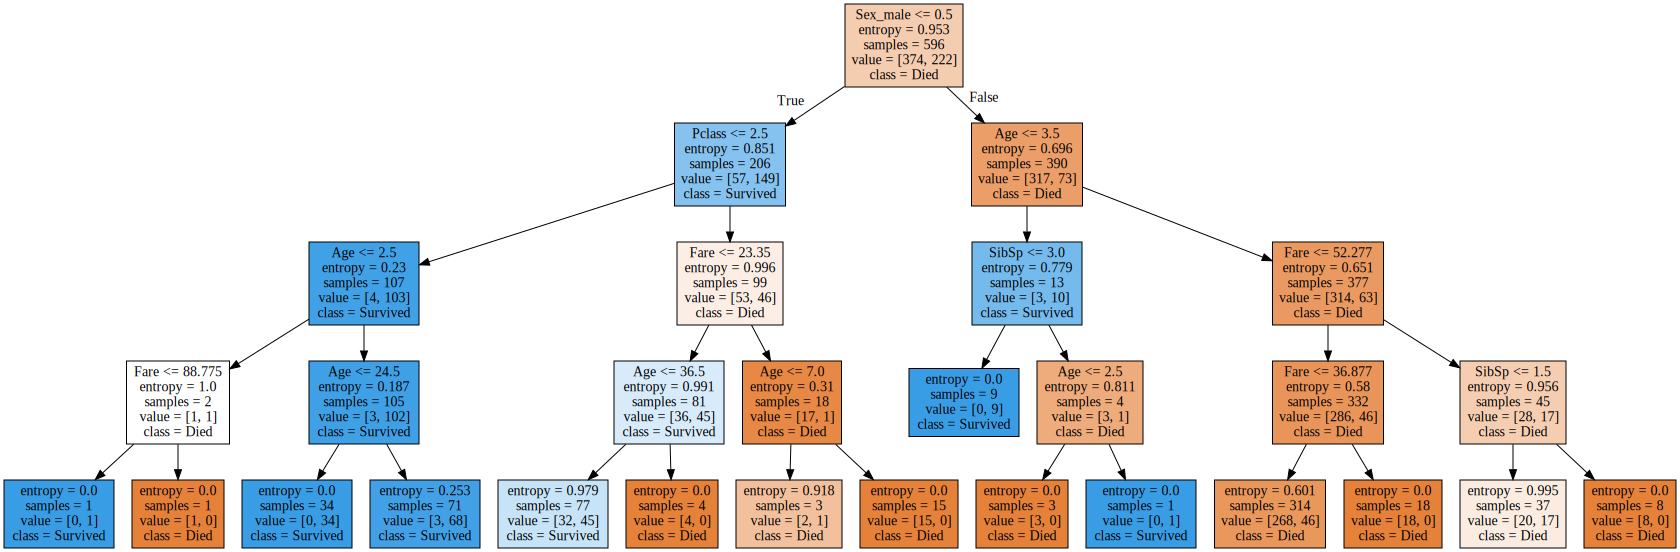

In [83]:
graph = Source (tree.export_graphviz(clf, out_file=None, feature_names=list(X)
                                    , class_names=['Died', 'Survived']
                                    , filled=True))
display(SVG(graph.pipe(format='svg')))

In [14]:
X_train = iris_train.iloc[:, 0:-1]
X_test = iris_test.iloc[:, 0:-1]
y_train = iris_train.iloc[:, -1]
y_test = iris_test.iloc[:, -1]

In [19]:
max_depth_values = range(1,100)

In [20]:
scores_data = pd.DataFrame()

In [47]:
for max_depth in max_depth_values:
    rs = np.random.seed(max_depth)
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    score = clf.score(X_train,y_train)
    accuracy_score = clf.score(X_test,y_test)
    temp_scores_data = pd.DataFrame({'max_depth':[max_depth],\
                                     'score':[score],\
                                     'accuracy_score':[accuracy_score]})
    scores_data = scores_data.append(temp_scores_data)

In [48]:
scores_data[scores_data.accuracy_score == scores_data.accuracy_score.max()]

,max_depth,score,accuracy_score
0,2,0.97,0.94
0,3,0.99,0.94
0,2,0.97,0.94
0,3,0.99,0.94
0,2,0.97,0.94
0,3,0.99,0.94
0,6,1.00,0.94
0,8,1.00,0.94
0,10,1.00,0.94
0,11,1.00,0.94


In [49]:
scores_data.head()

,max_depth,score,accuracy_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


In [50]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], value_vars = ['score', 'accuracy_score'], var_name = 'set_type', value_name = 'score')

c:\users\pauli\pp\lib\site-packages\IPython\core\interactiveshell.py:3427: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
scores_data_long

,max_depth,set_type,score
0,1,score,0.70
1,2,score,0.97
2,3,score,0.99
3,4,score,1.00
4,5,score,1.00
...,...,...,...
589,95,accuracy_score,0.92
590,96,accuracy_score,0.92
591,97,accuracy_score,0.92
592,98,accuracy_score,0.92


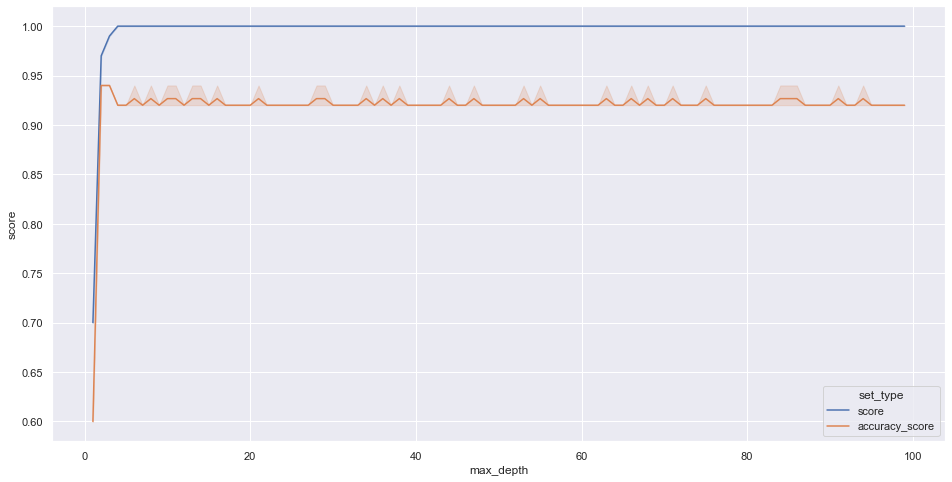

In [52]:
sns.lineplot(x ='max_depth', y='score', hue='set_type', data = scores_data_long)
sns.set(rc={'figure.figsize':(16,8)})

## Dogs & Cats

In [110]:
dogscats = pd.read_csv("./dogs_n_cats.csv", index_col = False)

In [111]:
dogscats.head(5)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [112]:
X_tr = dogscats.iloc[:,0:-2]
y_tr = dogscats.iloc[:,-1]

In [122]:
y_tr = y_tr.replace({'собачка': 1, 'котик':0})

In [128]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 25, random_state=42)
clf.fit(X_tr, y_tr)
score = clf.score(X_tr,y_tr)

In [137]:
dogscats_test = pd.read_json('./dogs_cats_test.txt')
X_te = dogscats_test.iloc[:,0:-1]
y_te = dogscats_test.iloc[:,-1]

In [138]:
X_te.head()

,Длина,Высота,Шерстист,Гавкает
0,21,25.2,1,1
1,30,36.0,1,1
2,24,28.8,1,1
3,18,21.6,1,1
4,15,18.0,1,0


In [139]:
accuracy_score = clf.score(X_te,y_te)

In [140]:
accuracy_score

0.02

In [141]:
np.sum(y_te == 1)

52